In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
#import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

In [2]:
from tensorflow.python.client import device_lib

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1522140141735057750
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10083106816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11042357766132611756
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:0a:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [4]:
import tensorflow
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
breeds = os.listdir("C:/Users/usach/Desktop/pet")

In [6]:
x = []
y = []

In [7]:
def read_files(breed):
    print(breed)
    listt = []
    for file in os.listdir('C:/Users/usach/Desktop/pet/' + str(breed)):
        im = Image.open('C:/Users/usach/Desktop/pet/' + breed + '/' + file)
        listt.append(im)
    print(len(listt))  
    
    for j in range(len(listt)):
        #print(j)
        #print(listt)
        y.append(str(breed))
        #print(y)
        
        
        width, height = listt[j].size
        if width == height:
            listt[j] = listt[j].resize((256,256), Image.ANTIALIAS)
        else:
            if width > height:
                left = width/2 - height/2
                right = width/2 + height/2
                top = 0
                bottom = height
                listt[j] = listt[j].crop((left,top,right,bottom))
                listt[j] = listt[j].resize((256,256), Image.ANTIALIAS)
            else:
                left = 0
                right = width
                top = 0
                bottom = width
                listt[j] = listt[j].crop((left,top,right,bottom))
                listt[j] = listt[j].resize((256,256), Image.ANTIALIAS)
        
        ar = np.asarray(listt[j])
        x.append(ar)
        
        
    display(random.choice(listt))
    
    for file in os.listdir('C:/Users/usach/Desktop/pet/' + str(breed)):
        im.close
        

Abyssinian
Abyssinian
603


c:\users\usach\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
c:\users\usach\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
c:\users\usach\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


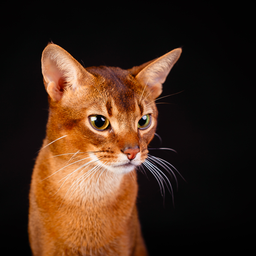

Bengal
Bengal
919


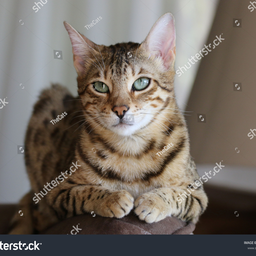

Bombay
Bombay
1737


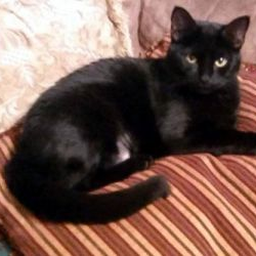

British_Shorthair
British_Shorthair
2458


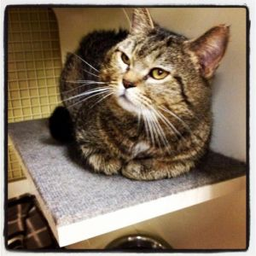

Exotic_Shorthair
Exotic_Shorthair
413


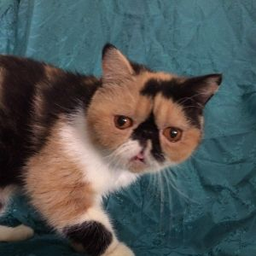

Maine Coon
Maine Coon
1549


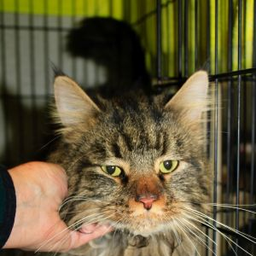

Munchkin
Munchkin
493


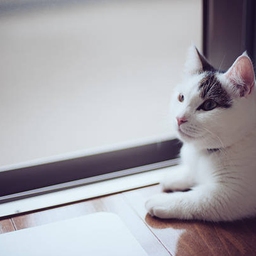

Persian
Persian
997


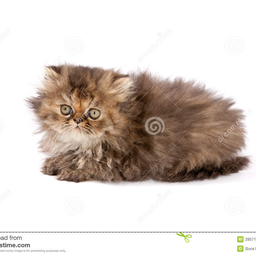

Ragdoll
Ragdoll
832


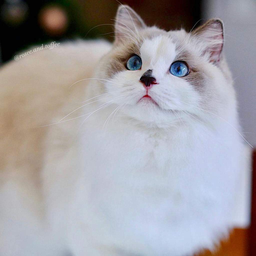

Russian_Blue
Russian_Blue
835


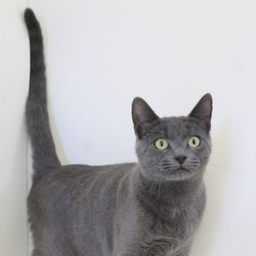

Scottish_Fold
Scottish_Fold
1333


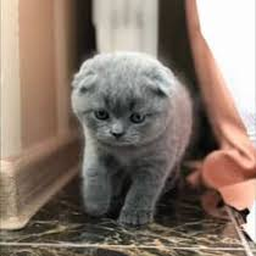

Siamese
Siamese
939


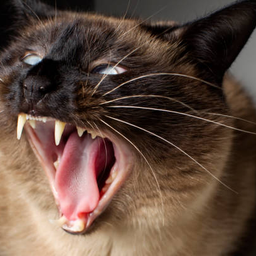

Siberian
Siberian
1156


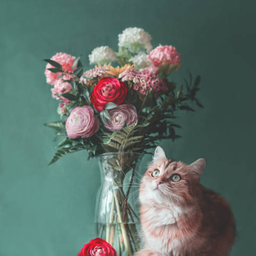

Sphynx
Sphynx
921


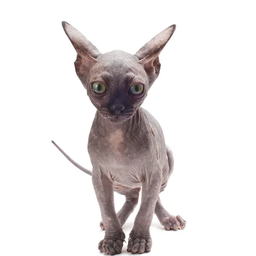

Turkish_Angora
Turkish_Angora
503


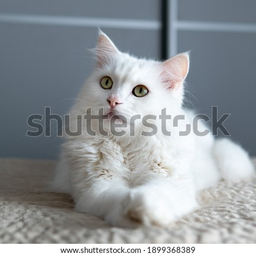

In [8]:
for breed in breeds:
    print(breed)
    read_files(breed)

In [9]:
x = np.array(x)
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [10]:
len(y)

15688

In [11]:
len(x)

15688

In [12]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [14]:
model = Sequential()
model.add(Conv2D(28, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(56, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(112, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(224, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(448, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(896, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(1792, (3,3), activation='relu'))
#model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

c:\users\usach\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 28)      784       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 28)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 56)      14168     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 56)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 112)       56560     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 112)     

In [16]:
datagen = ImageDataGenerator(
      rescale=1./255.,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow(x_train, y_train, batch_size=1)

test = test_datagen.flow(
        x_test, y_test,
        batch_size=1)


In [17]:
history = model.fit(train, epochs=20, validation_data=test)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14117/14119 [============================>.] - ETA: 0s - loss: 2.7858 - accuracy: 0.1564WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D1C2D98950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY

In [21]:
history = model.fit(train, epochs=1, validation_data=test)

14119/14119 [==============================] - 167s 12ms/step - loss: 1.1156 - accuracy: 0.6588 - val_loss: 0.9257 - val_accuracy: 0.7004


In [23]:
history = model.fit(train, epochs=1, validation_data=test)

14119/14119 [==============================] - 166s 12ms/step - loss: 1.1011 - accuracy: 0.6622 - val_loss: 1.0461 - val_accuracy: 0.6864


In [24]:
history = model.fit(train, epochs=1, validation_data=test)

14119/14119 [==============================] - 209s 15ms/step - loss: 1.0872 - accuracy: 0.6665 - val_loss: 0.8816 - val_accuracy: 0.7457


In [25]:
history = model.fit(train, epochs=1, validation_data=test)

14119/14119 [==============================] - 200s 14ms/step - loss: 1.0901 - accuracy: 0.6648 - val_loss: 0.9249 - val_accuracy: 0.7004


In [29]:
history = model.fit(train, epochs=1, validation_data=test)

14119/14119 [==============================] - 168s 12ms/step - loss: 1.0703 - accuracy: 0.6763 - val_loss: 0.9071 - val_accuracy: 0.7361


In [30]:
history = model.fit(train, epochs=1, validation_data=test)

14119/14119 [==============================] - 218s 15ms/step - loss: 1.0611 - accuracy: 0.6759 - val_loss: 0.8581 - val_accuracy: 0.7451


In [32]:
history = model.fit(train, epochs=1, validation_data=test)

14119/14119 [==============================] - 203s 14ms/step - loss: 1.0522 - accuracy: 0.6792 - val_loss: 0.9171 - val_accuracy: 0.7355


In [33]:
history = model.fit(train, epochs=1, validation_data=test)


14119/14119 [==============================] - 212s 15ms/step - loss: 1.0495 - accuracy: 0.6777 - val_loss: 0.9436 - val_accuracy: 0.7189


In [31]:
model.save('1st')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: 1st\assets


INFO:tensorflow:Assets written to: 1st\assets


In [28]:
model.evaluate(test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1569/1569 [==============================] - 8s 4ms/step - loss: 0.6214 - accuracy: 0.8152


[0.6213836073875427, 0.8151689171791077]